<a href="https://colab.research.google.com/github/muhraffibr/Documents/blob/master/tubesAIplskelar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STUDENT PERFORMANCE PREDICTION - COMPLETE ANALYSIS

Loading dataset...
✓ Dataset loaded: 493 rows, 16 columns
EXPLORATORY DATA ANALYSIS

1. DATASET INFO
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   493 non-null    object 
 1   Gender       493 non-null    object 
 2   HSC          493 non-null    float64
 3   SSC          493 non-null    float64
 4   Income       493 non-null    object 
 5   Hometown     493 non-null    object 
 6   Computer     493 non-null    int64  
 7   Preparation  493 non-null    object 
 8   Gaming       493 non-null    object 
 9   Attendance   493 non-null    object 
 10  Job          493 non-null    object 
 11  English      493 non-null    int64  
 12  Extra        493 non-null    object 
 13  Semester     493 non-null 

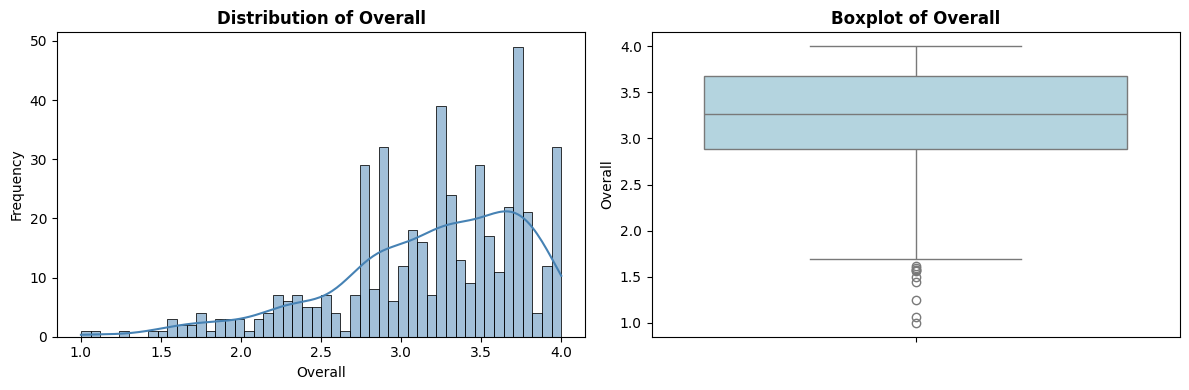

Mean   : 3.19
Median : 3.27
Std    : 0.59
Min    : 1.00
Max    : 4.00

6. OUTLIER ANALYSIS (IQR Method)
--------------------------------------------------------------------------------
Q1  : 2.88
Q3  : 3.68
IQR : 0.80
Lower bound: 1.68
Upper bound: 4.88

Outliers: 10 (2.03%)

7. CORRELATION ANALYSIS
--------------------------------------------------------------------------------


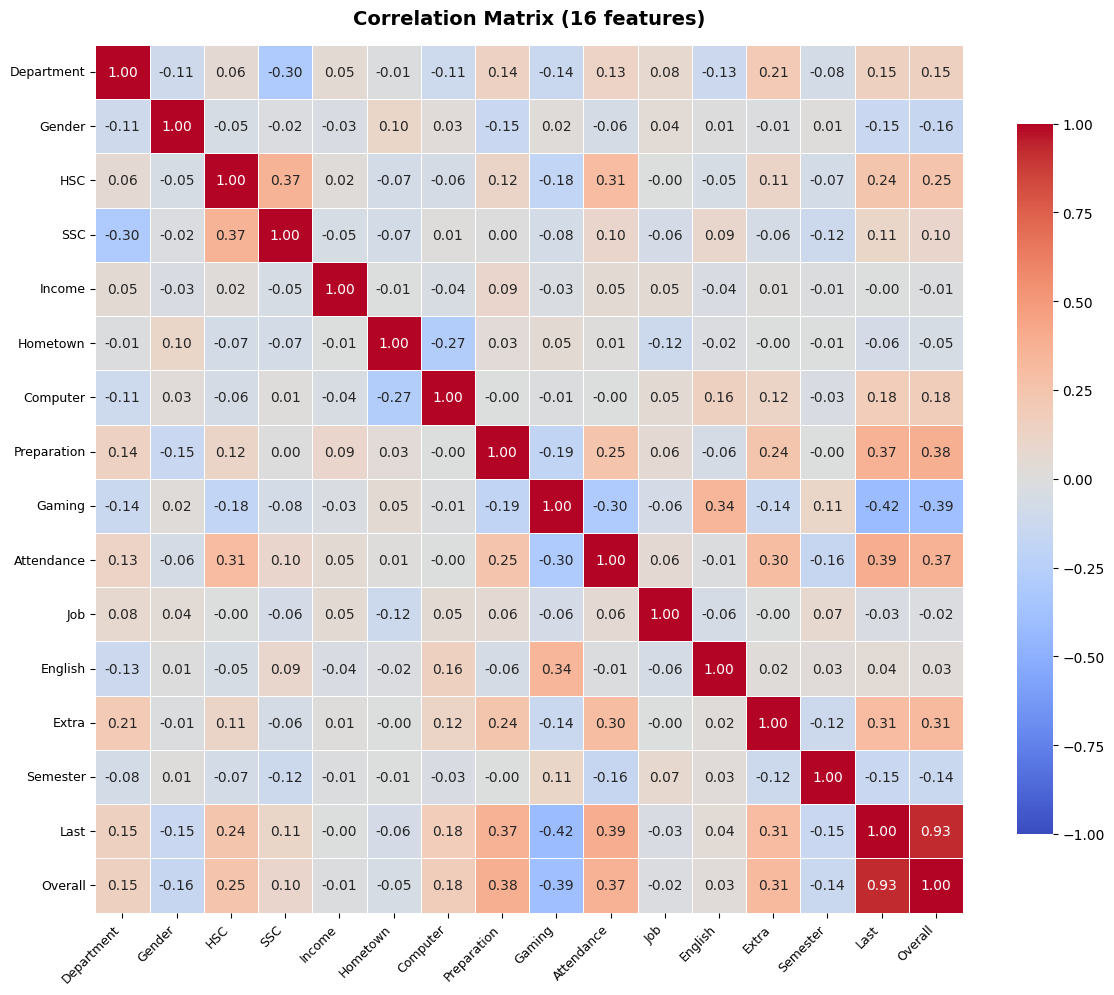


Top 10 correlations with Overall:
--------------------------------------------------------------------------------
 1. Overall                          :  1.0000
 2. Last                             :  0.9251
 3. Preparation               (cat)  :  0.3841
 4. Attendance                (cat)  :  0.3686
 5. Extra                     (cat)  :  0.3137
 6. HSC                              :  0.2520
 7. Computer                         :  0.1775
 8. Department                (cat)  :  0.1509
 9. SSC                              :  0.0987
10. English                          :  0.0301


FEATURE ENGINEERING

1. POLYNOMIAL FEATURES
--------------------------------------------------------------------------------
  ✓ HSC_squared
  ✓ SSC_squared
  ✓ Computer_squared

2. INTERACTION FEATURES
--------------------------------------------------------------------------------
  ✓ HSC_SSC_interaction
  ✓ English_Computer_interaction

3. RATIO FEATURES
----------------------------------------------------

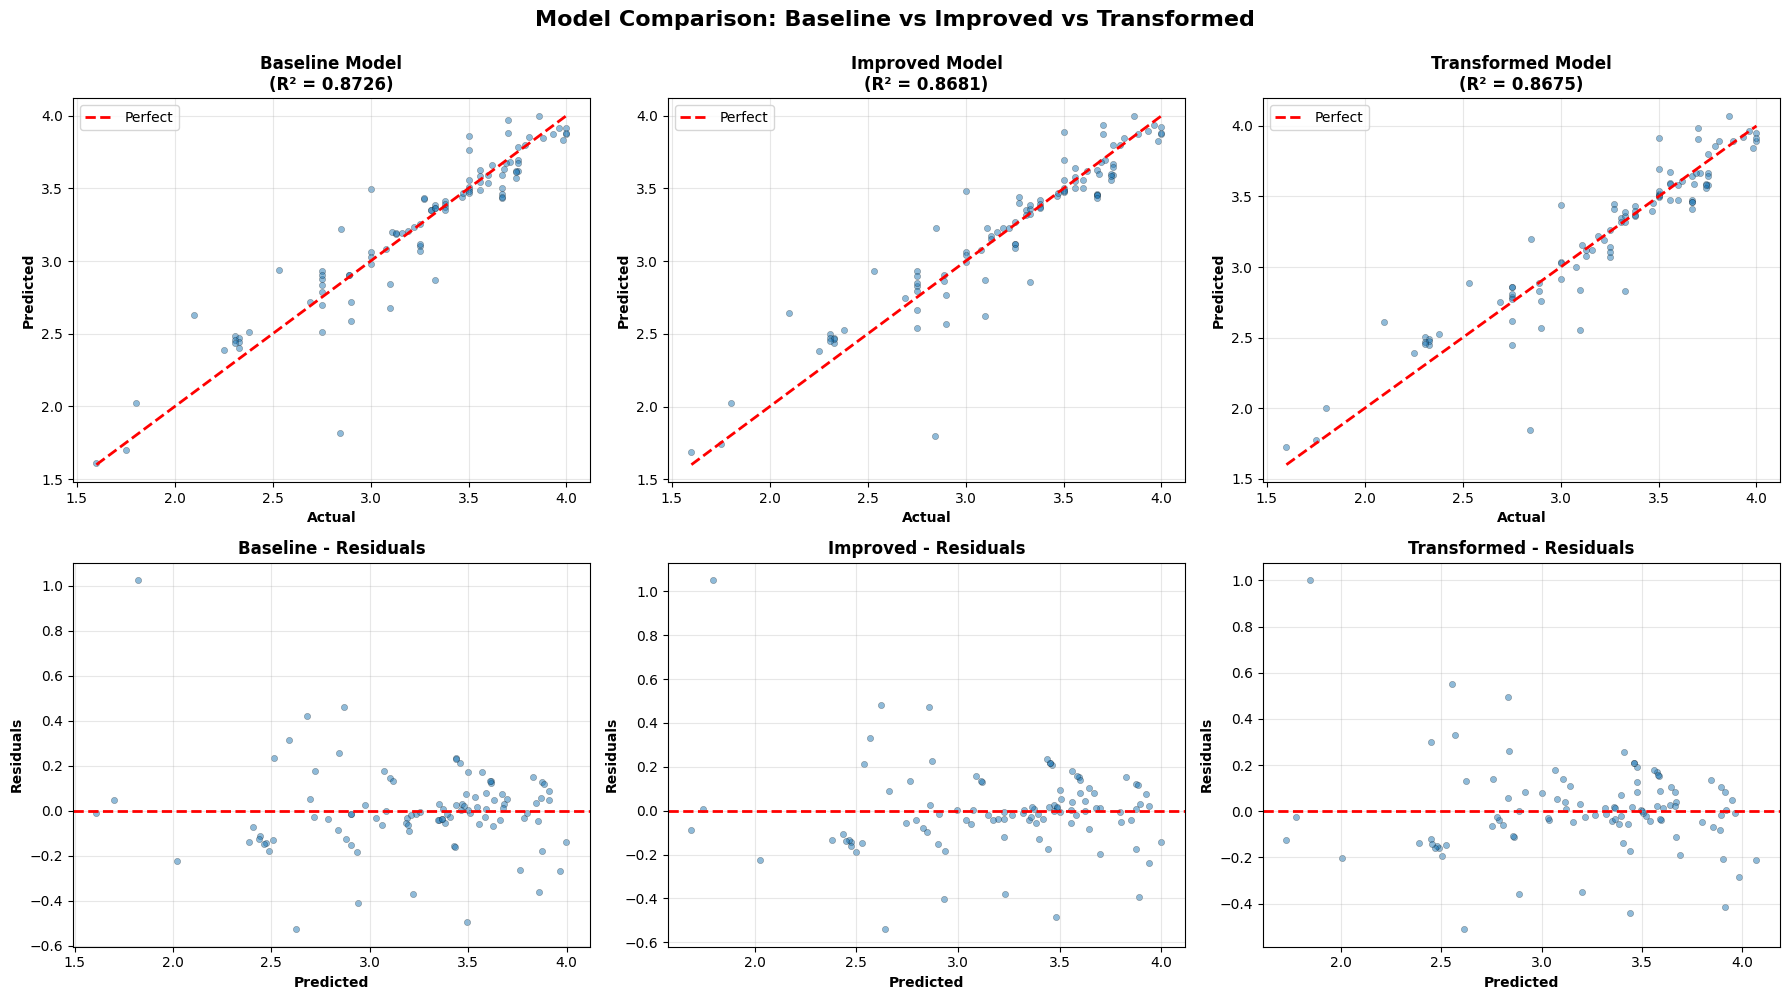


RESIDUAL DIAGNOSTICS

1. NORMALITY TESTS
--------------------------------------------------------------------------------

Improved Model:
  Shapiro-Wilk: stat=0.8714, p=0.000000
  Skewness: 1.3295 | Kurtosis: 7.9640
  Result: Not Normal
  Skewness interpretation: right-skewed (model under-predicts high values)
  Kurtosis interpretation: leptokurtic (heavy tails, more outliers)

Transformed Model:
  Shapiro-Wilk: stat=0.8940, p=0.000001
  Skewness: 1.2311 | Kurtosis: 6.3946
  Result: Not Normal
  Skewness interpretation: right-skewed (model under-predicts high values)
  Kurtosis interpretation: leptokurtic (heavy tails, more outliers)


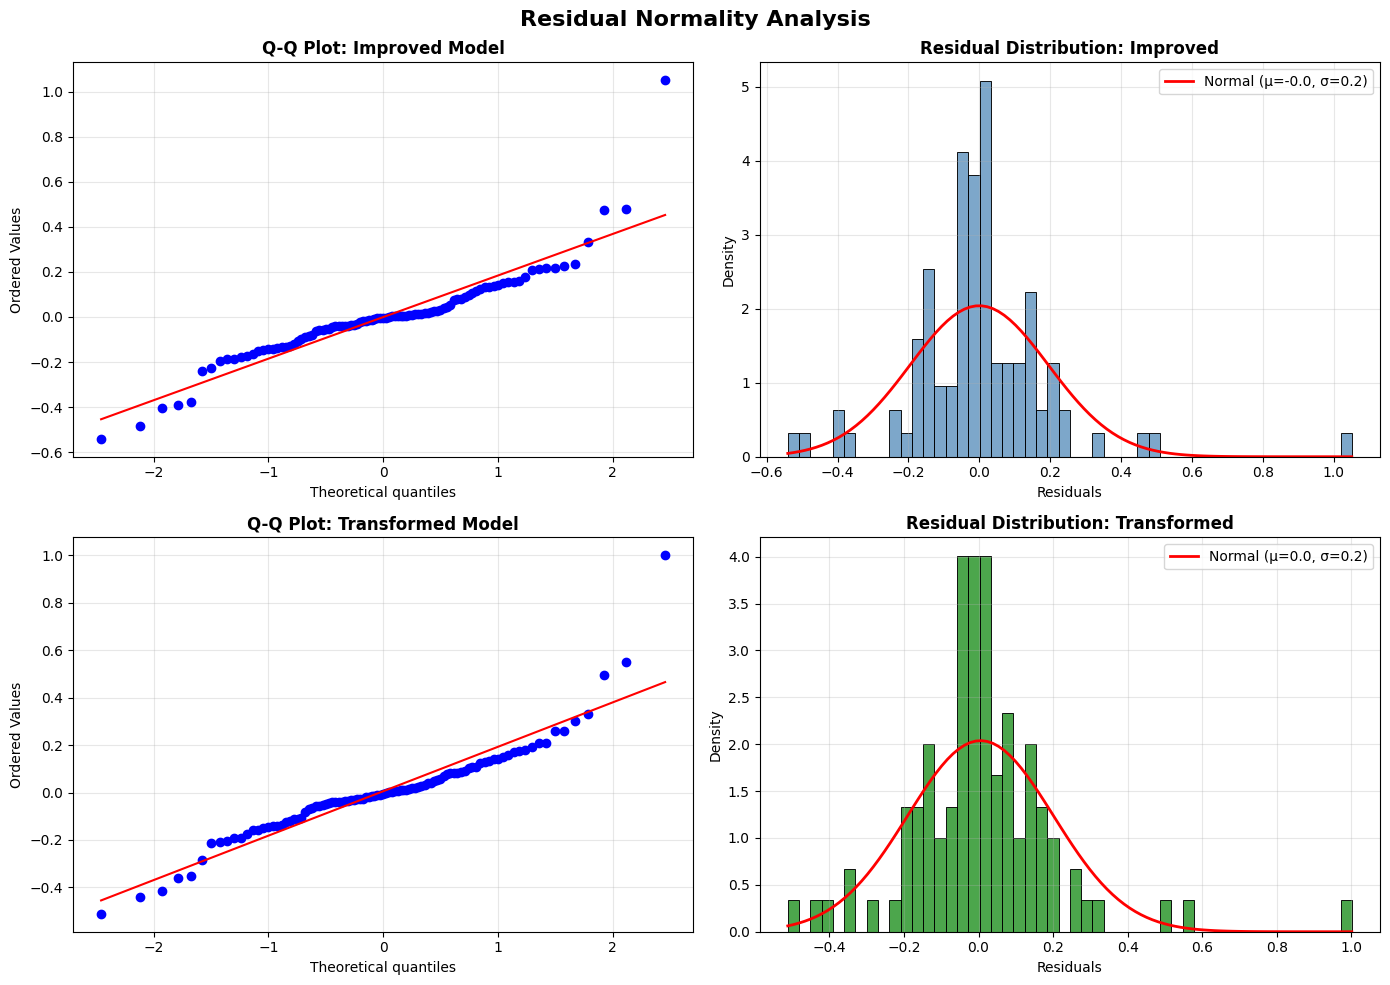



COEFFICIENT INTERPRETATION & SIGNIFICANCE

Intercept: 3.18

Coefficient Rankings (Standardized):
--------------------------------------------------------------------------------
Rank  Feature                       Coefficient    Impact
--------------------------------------------------------------------------------
1     HSC                                  -0.6185  - Negative
2     Last                                  0.5314  + Positive
3     HSC_SSC_interaction                   0.3979  + Positive
4     HSC_SSC_ratio                         0.2590  + Positive
5     HSC_squared                           0.0518  + Positive
6     Computer                             -0.0356  - Negative
7     English_Computer_interaction          0.0292  + Positive
8     Preparation                           0.0282  + Positive
9     Extra                                 0.0235  + Positive
10    Attendance                           -0.0206  - Negative
11    Computer_squared                      0.0193 

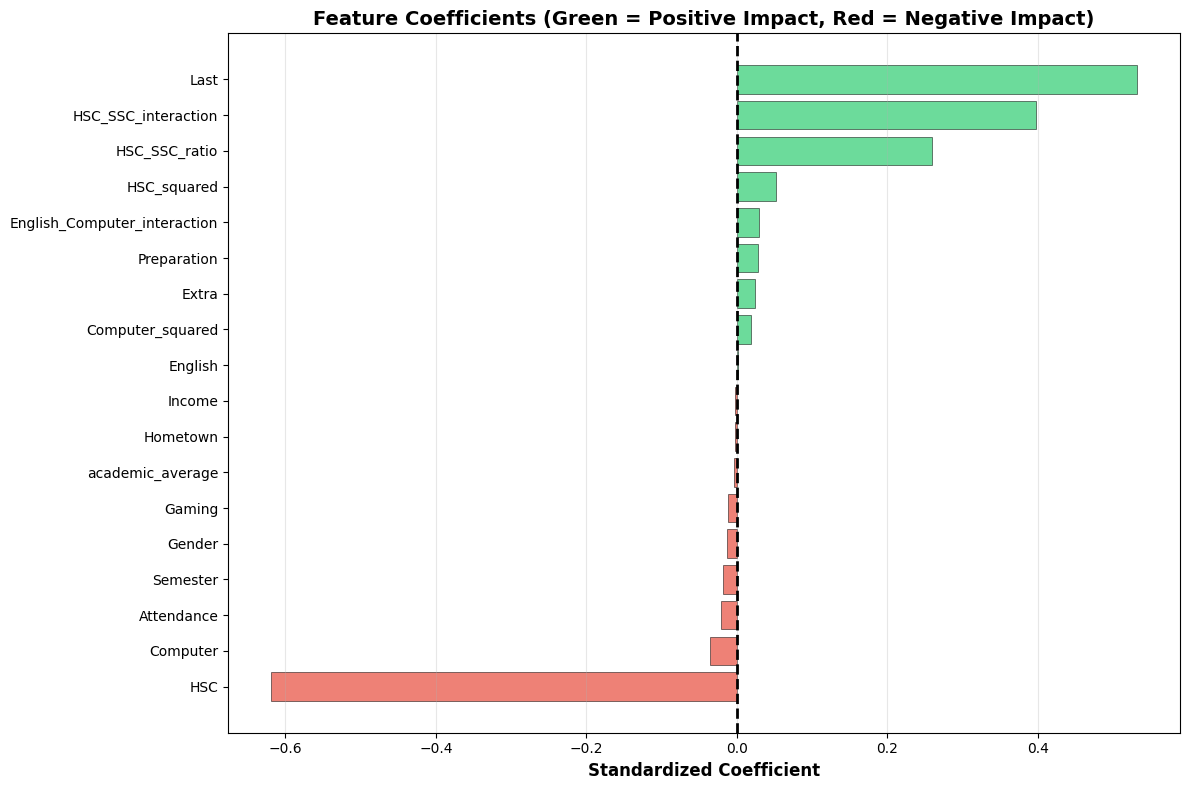



5-FOLD CROSS-VALIDATION

Cross-Validation R² Scores:
  Fold 1: 0.6987
  Fold 2: 0.9092
  Fold 3: 0.7304
  Fold 4: 0.8673
  Fold 5: 0.9191

Mean R²: 0.8250 (±0.0923)


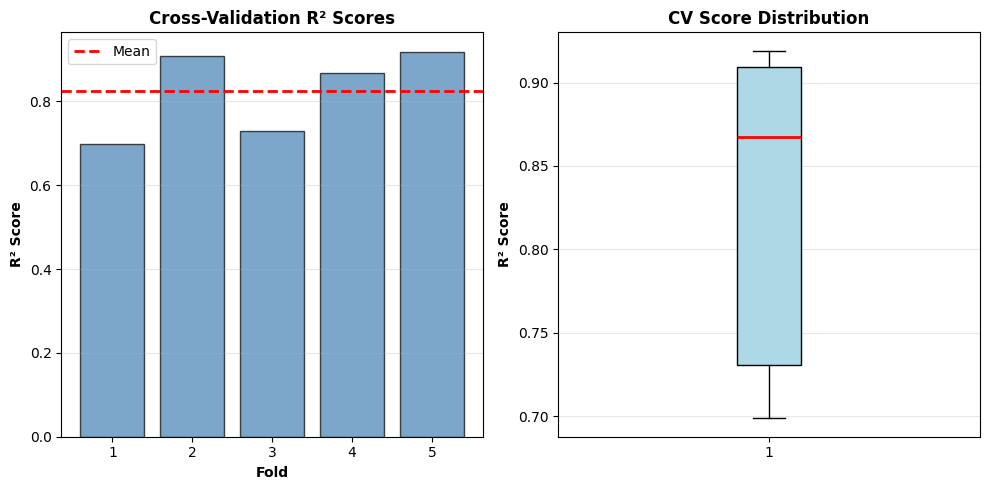


FINAL REGRESSION EQUATIONS

1. INTERPRETATION MODEL (Standardized Features)
--------------------------------------------------------------------------------
Ŷ = 3.18
    - (0.01 × Gender)
    - (0.62 × HSC)
    - (0.00 × Income)
    - (0.00 × Hometown)
    - (0.04 × Computer)
    + (0.03 × Preparation)
    - (0.01 × Gaming)
    - (0.02 × Attendance)
    + (0.00 × English)
    + (0.02 × Extra)
    - (0.02 × Semester)
    + (0.53 × Last)
    + (0.05 × HSC_squared)
    + (0.02 × Computer_squared)
    + (0.40 × HSC_SSC_interaction)
    + (0.03 × English_Computer_interaction)
    + (0.26 × HSC_SSC_ratio)
    - (0.00 × academic_average)


2. PREDICTION MODEL (Square Root Transform)
--------------------------------------------------------------------------------
√(Ŷ) = 1.77
    - (0.00 × Gender)
    - (0.19 × HSC)
    - (0.00 × Income)
    - (0.00 × Hometown)
    - (0.02 × Computer)
    + (0.01 × Preparation)
    - (0.00 × Gaming)
    - (0.01 × Attendance)
    + (0.00 × English)
    + (0.01 

In [ ]:
# ============================================================
# STUDENT PERFORMANCE PREDICTION
# Complete Linear Regression Analysis with Advanced Techniques
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from scipy.stats import shapiro

# ============================================================
# CONFIG
# ============================================================

DATASET_URL = "https://data.mendeley.com/public-files/datasets/5b82ytz489/files/21461ab8-2eb2-4768-9551-5636024f2989/file_downloaded"
TARGET_COLUMN = "Overall"
LEARNING_RATE = 0.01
N_ITERATIONS = 1000
RANDOM_SEED = 42


# ============================================================
# MODEL CLASS
# ============================================================

class LinearRegressionAnalysis:

    def __init__(self, lr, epochs):
        self.lr = lr
        self.epochs = epochs
        self.W = None
        self.b = 0
        self.losses = []
        self.encoders = {}
        self.scaler = StandardScaler()
        self.features = None

        # Store different model versions
        self.model_baseline = None
        self.model_improved = None
        self.model_transformed = None

    # --------------------------------------------------------
    # LOAD DATA
    # --------------------------------------------------------
    def load_data(self, url):
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        return df

    # --------------------------------------------------------
    # EDA (EXPLORATORY DATA ANALYSIS)
    # --------------------------------------------------------
    def exploratory_analysis(self, df, target):
        print("=" * 80)
        print("EXPLORATORY DATA ANALYSIS")
        print("=" * 80)

        print("\n1. DATASET INFO")
        print("-" * 80)
        print(df.info())

        print("\n2. DESCRIPTIVE STATISTICS")
        print("-" * 80)
        print(df.describe().T)

        print("\n3. MISSING VALUES")
        print("-" * 80)
        missing = df.isnull().sum().to_frame('missing_count')
        print(missing[missing['missing_count'] > 0])
        if missing['missing_count'].sum() == 0:
            print("✓ No missing values found!")

        print("\n4. DUPLICATE DATA")
        print("-" * 80)
        duplicates = df.duplicated().sum()
        print(f"Jumlah data duplikat: {duplicates}")
        if duplicates > 0:
            print(f"Menghapus {duplicates} data duplikat...")
            df = df.drop_duplicates()

        # Target variable analysis
        if target in df.columns:
            print(f"\n5. TARGET VARIABLE ANALYSIS: {target}")
            print("-" * 80)

            fig, axes = plt.subplots(1, 2, figsize=(12, 4))

            sns.histplot(df[target], bins=50, ax=axes[0], kde=True, color='steelblue')
            axes[0].set_title(f'Distribution of {target}', fontweight='bold')
            axes[0].set_xlabel(target)
            axes[0].set_ylabel('Frequency')

            sns.boxplot(y=df[target], ax=axes[1], color='lightblue')
            axes[1].set_title(f'Boxplot of {target}', fontweight='bold')
            axes[1].set_ylabel(target)

            plt.tight_layout()
            plt.show()

            print(f"Mean   : {df[target].mean():.2f}")
            print(f"Median : {df[target].median():.2f}")
            print(f"Std    : {df[target].std():.2f}")
            print(f"Min    : {df[target].min():.2f}")
            print(f"Max    : {df[target].max():.2f}")

            # Outlier analysis
            print(f"\n6. OUTLIER ANALYSIS (IQR Method)")
            print("-" * 80)
            Q1 = df[target].quantile(0.25)
            Q3 = df[target].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            print(f"Q1  : {Q1:.2f}")
            print(f"Q3  : {Q3:.2f}")
            print(f"IQR : {IQR:.2f}")
            print(f"Lower bound: {lower_bound:.2f}")
            print(f"Upper bound: {upper_bound:.2f}")

            outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]
            print(f"\nOutliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

        # Correlation analysis
        print(f"\n7. CORRELATION ANALYSIS")
        print("-" * 80)

        df_encoded = df.copy()
        cat_cols = df_encoded.select_dtypes(include="object").columns
        temp_encoders = {}

        for col in cat_cols:
            if col != target:
                le = LabelEncoder()
                df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
                temp_encoders[col] = le

        correlation = df_encoded.corr()
        n_features = len(correlation.columns)

        plt.figure(figsize=(max(12, n_features * 0.5), max(10, n_features * 0.45)))

        sns.heatmap(correlation, annot=n_features <= 20, cmap='coolwarm',
                   center=0, fmt='.2f', square=True, linewidths=0.5,
                   cbar_kws={'shrink': 0.8}, vmin=-1, vmax=1)

        plt.title(f'Correlation Matrix ({n_features} features)',
                 fontsize=14, fontweight='bold', pad=15)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()

        if target in correlation.columns:
            target_corr = correlation[target].sort_values(ascending=False)
            print(f"\nTop 10 correlations with {target}:")
            print("-" * 80)
            for idx, (feature, corr_value) in enumerate(target_corr.head(10).items(), 1):
                marker = " (cat)" if feature in temp_encoders else ""
                print(f"{idx:2d}. {feature:25s}{marker:7s} : {corr_value:7.4f}")

        print("\n" + "=" * 80)
        return df

    # --------------------------------------------------------
    # FEATURE ENGINEERING
    # --------------------------------------------------------
    def feature_engineering(self, df, target):
        print("\n" + "=" * 80)
        print("FEATURE ENGINEERING")
        print("=" * 80)

        df_fe = df.copy()
        new_features = []

        # 1. Polynomial Features
        print("\n1. POLYNOMIAL FEATURES")
        print("-" * 80)
        num_features = df_fe.select_dtypes(include=[np.number]).columns.tolist()
        if target in num_features:
            num_features.remove(target)

        for feat in num_features[:3]:
            new_feat = f'{feat}_squared'
            df_fe[new_feat] = df_fe[feat] ** 2
            new_features.append(new_feat)
            print(f"  ✓ {new_feat}")

        # 2. Interaction Features
        print("\n2. INTERACTION FEATURES")
        print("-" * 80)

        interactions = [
            ('HSC', 'SSC', 'HSC_SSC_interaction'),
            ('English', 'Computer', 'English_Computer_interaction')
        ]

        for col1, col2, name in interactions:
            if col1 in df_fe.columns and col2 in df_fe.columns:
                df_fe[name] = df_fe[col1] * df_fe[col2]
                new_features.append(name)
                print(f"  ✓ {name}")

        # 3. Ratio Features
        print("\n3. RATIO FEATURES")
        print("-" * 80)
        if 'HSC' in df_fe.columns and 'SSC' in df_fe.columns:
            # Avoid division by zero and ensure no inf values
            df_fe['HSC_SSC_ratio'] = df_fe['HSC'] / (df_fe['SSC'] + 1e-5)
            # Cap extreme ratios
            df_fe['HSC_SSC_ratio'] = df_fe['HSC_SSC_ratio'].clip(0, 10)
            new_features.append('HSC_SSC_ratio')
            print(f"  ✓ HSC_SSC_ratio (capped at [0, 10])")

        # 4. Aggregate Features
        print("\n4. AGGREGATE FEATURES")
        print("-" * 80)
        academic_cols = [c for c in ['HSC', 'SSC', 'Last'] if c in df_fe.columns]
        if len(academic_cols) >= 2:
            df_fe['academic_average'] = df_fe[academic_cols].mean(axis=1)
            new_features.append('academic_average')
            print(f"  ✓ academic_average")

        print(f"\n{'='*80}")
        print(f"SUMMARY: Created {len(new_features)} new features")
        print(f"Total features: {len(df_fe.columns) - 1}")

        # Final check for NaN/inf after feature engineering
        nan_count = df_fe.isnull().sum().sum()
        inf_count = np.isinf(df_fe.select_dtypes(include=[np.number])).sum().sum()

        if nan_count > 0 or inf_count > 0:
            print(f"\n⚠ Cleaning: {nan_count} NaN and {inf_count} inf values")
            df_fe = df_fe.replace([np.inf, -np.inf], np.nan)
            df_fe = df_fe.dropna()
            print(f"  Rows after cleaning: {len(df_fe)}")

        print("=" * 80)

        return df_fe

    # --------------------------------------------------------
    # PREPROCESSING
    # --------------------------------------------------------
    def preprocess(self, df, target):
        print("\n" + "=" * 80)
        print("DATA PREPROCESSING")
        print("=" * 80)

        # 1. Handle missing values
        print("\n1. MISSING VALUES")
        print("-" * 80)
        before = len(df)

        # Check for NaN in each column
        missing_info = df.isnull().sum()
        if missing_info.sum() > 0:
            print("Missing values by column:")
            for col, count in missing_info[missing_info > 0].items():
                print(f"  {col}: {count} ({count/len(df)*100:.2f}%)")

        df = df.dropna().copy()
        after = len(df)
        print(f"Dropped {before - after} rows → {after} remaining")

        # Additional check: replace inf values
        df = df.replace([np.inf, -np.inf], np.nan)
        if df.isnull().sum().sum() > 0:
            print(f"⚠ Found inf values, dropping {df.isnull().sum().sum()} more rows")
            df = df.dropna().copy()
            print(f"Final rows: {len(df)}")

        # 2. Encode categorical
        print("\n2. ENCODING CATEGORICAL")
        print("-" * 80)
        cat_cols = [c for c in df.select_dtypes(include="object").columns if c != target]

        for col in cat_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            self.encoders[col] = le
            print(f"  ✓ {col}: {len(le.classes_)} categories")

        # 3. Outlier handling
        print("\n3. OUTLIER HANDLING (Capping)")
        print("-" * 80)
        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        capped = []

        for col in num_cols:
            if col != target:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR

                outliers = ((df[col] < lower) | (df[col] > upper)).sum()
                if outliers > len(df) * 0.01:
                    df[col] = df[col].clip(lower, upper)
                    capped.append(col)

        print(f"Capped {len(capped)} features" if capped else "No capping needed")

        # 4. VIF Check
        print("\n4. MULTICOLLINEARITY (VIF)")
        print("-" * 80)
        X_vif = df.drop(columns=[target])

        vif_data = []
        for i, col in enumerate(X_vif.columns):
            try:
                y_temp = X_vif.iloc[:, i]
                X_temp = X_vif.drop(columns=[col])
                if X_temp.shape[1] > 0:
                    lr = LinearRegression()
                    lr.fit(X_temp, y_temp)
                    r2 = lr.score(X_temp, y_temp)
                    vif = 1 / (1 - r2) if r2 < 0.999 else np.inf
                else:
                    vif = 1.0
                vif_data.append({'Feature': col, 'VIF': vif})
            except:
                vif_data.append({'Feature': col, 'VIF': np.nan})

        vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)

        # Drop features with VIF = inf
        inf_features = vif_df[vif_df['VIF'] == np.inf]['Feature'].tolist()
        if inf_features:
            print(f"⚠ Dropping {len(inf_features)} features with VIF = ∞:")
            for feat in inf_features:
                if feat in df.columns:
                    df = df.drop(columns=[feat])
                    print(f"  ✗ {feat}")

        high_vif = len(vif_df[(vif_df['VIF'] > 10) & (vif_df['VIF'] != np.inf)])
        print(f"\n✓ VIF check completed")
        print(f"  High VIF (>10): {high_vif} features")

        # 5. Train-test split
        print("\n5. TRAIN-TEST SPLIT")
        print("-" * 80)

        X = df.drop(columns=[target]).values
        y = df[target].values.reshape(-1, 1)
        self.features = df.drop(columns=[target]).columns.tolist()

        np.random.seed(RANDOM_SEED)
        idx = np.random.permutation(len(X))
        split = int(0.8 * len(X))

        X_train, X_test = X[idx[:split]], X[idx[split:]]
        y_train, y_test = y[idx[:split]], y[idx[split:]]

        print(f"Train: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
        print(f"Test : {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

        print("\n" + "=" * 80)
        return X_train, X_test, y_train, y_test

    # --------------------------------------------------------
    # MODEL TRAINING & EVALUATION
    # --------------------------------------------------------
    def train_baseline(self, X_train, y_train):
        """Train baseline model with basic normalization to prevent overflow"""
        print("\n" + "=" * 80)
        print("TRAINING BASELINE MODEL (Minimal Normalization)")
        print("=" * 80)

        # Apply minimal normalization to prevent overflow
        # Use mean and std for normalization
        X_mean = X_train.mean(axis=0)
        X_std = X_train.std(axis=0)
        X_std[X_std == 0] = 1  # Avoid division by zero

        X_train_norm = (X_train - X_mean) / X_std

        print(f"Applied basic normalization to prevent overflow")
        print(f"  Original X range: [{X_train.min():.2f}, {X_train.max():.2f}]")
        print(f"  Normalized X range: [{X_train_norm.min():.2f}, {X_train_norm.max():.2f}]")

        n_samples, n_features = X_train_norm.shape
        self.W = np.zeros((n_features, 1))
        self.b = 0
        self.losses = []

        for i in range(self.epochs):
            y_hat = X_train_norm @ self.W + self.b
            error = y_hat - y_train

            # Check for overflow
            if np.any(np.isnan(error)) or np.any(np.isinf(error)):
                print(f"\n⚠ Overflow detected at iteration {i}")
                print(f"  Stopping training early")
                break

            dW = (X_train_norm.T @ error) / n_samples
            db = np.sum(error) / n_samples

            self.W -= self.lr * dW
            self.b -= self.lr * db

            loss = np.mean(error ** 2) / 2
            self.losses.append(loss)

            if i % 200 == 0:
                print(f"Iteration {i:4d} | Loss: {loss:.6f}")

        # Store normalization parameters for prediction
        self.baseline_mean = X_mean
        self.baseline_std = X_std

        print("✓ Baseline training completed")

    def train_improved(self, X_train, y_train, X_test, y_test):
        """Train improved model with StandardScaler"""
        print("\n" + "=" * 80)
        print("TRAINING IMPROVED MODEL (With StandardScaler)")
        print("=" * 80)

        # Validate input data
        print("\nValidating input data...")
        print(f"X_train shape: {X_train.shape}")
        print(f"y_train shape: {y_train.shape}")

        # Check for NaN in input
        nan_in_X = np.isnan(X_train).sum()
        nan_in_y = np.isnan(y_train).sum()

        if nan_in_X > 0:
            print(f"⚠ ERROR: Found {nan_in_X} NaN values in X_train")
            nan_cols = np.where(np.isnan(X_train).any(axis=0))[0]
            print(f"  Columns with NaN: {nan_cols}")
            print(f"  Feature names: {[self.features[i] for i in nan_cols]}")
            raise ValueError("Cannot proceed with NaN in training data")

        if nan_in_y > 0:
            print(f"⚠ ERROR: Found {nan_in_y} NaN values in y_train")
            raise ValueError("Cannot proceed with NaN in target variable")

        print("✓ No NaN values detected")

        # Check for inf in input
        inf_in_X = np.isinf(X_train).sum()
        inf_in_y = np.isinf(y_train).sum()

        if inf_in_X > 0:
            print(f"⚠ ERROR: Found {inf_in_X} Inf values in X_train")
            inf_cols = np.where(np.isinf(X_train).any(axis=0))[0]
            print(f"  Columns with Inf: {inf_cols}")
            print(f"  Feature names: {[self.features[i] for i in inf_cols]}")
            raise ValueError("Cannot proceed with Inf in training data")

        if inf_in_y > 0:
            print(f"⚠ ERROR: Found {inf_in_y} Inf values in y_train")
            raise ValueError("Cannot proceed with Inf in target variable")

        print("✓ No Inf values detected")

        # Apply StandardScaler
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Check after scaling
        if np.isnan(X_train_scaled).any():
            print("⚠ ERROR: NaN introduced by StandardScaler")
            nan_after = np.isnan(X_train_scaled).sum()
            print(f"  NaN count: {nan_after}")
            raise ValueError("Scaling produced NaN values")

        print("\nScaling statistics:")
        print(f"  Mean range: [{self.scaler.mean_.min():.4f}, {self.scaler.mean_.max():.4f}]")
        print(f"  Std range : [{self.scaler.scale_.min():.4f}, {self.scaler.scale_.max():.4f}]")

        # Check for zero std (which causes NaN)
        zero_std = np.where(self.scaler.scale_ == 0)[0]
        if len(zero_std) > 0:
            print(f"⚠ Warning: Features with zero std deviation:")
            for idx in zero_std:
                print(f"  - {self.features[idx]}")

        # Train with sklearn
        self.model_improved = LinearRegression()
        self.model_improved.fit(X_train_scaled, y_train.ravel())

        print("✓ Improved model training completed")

        return X_train_scaled, X_test_scaled

    def train_transformed(self, X_train_scaled, y_train, X_test_scaled, y_test):
        """Train model with square root transformation on target"""
        print("\n" + "=" * 80)
        print("TRAINING TRANSFORMED MODEL (Sqrt Transform)")
        print("=" * 80)

        # Check for negative values in target (can't sqrt negative)
        if np.any(y_train < 0):
            print(f"⚠ Warning: Found {(y_train < 0).sum()} negative values in y_train")
            print("  Clipping to 0 before sqrt transform")
            y_train = np.maximum(y_train, 0)

        if np.any(y_test < 0):
            print(f"⚠ Warning: Found {(y_test < 0).sum()} negative values in y_test")
            print("  Clipping to 0 before sqrt transform")
            y_test = np.maximum(y_test, 0)

        # Apply sqrt transformation
        y_train_sqrt = np.sqrt(y_train.ravel())
        y_test_sqrt = np.sqrt(y_test.ravel())

        # Check for NaN after sqrt
        if np.isnan(y_train_sqrt).any():
            nan_count = np.isnan(y_train_sqrt).sum()
            print(f"⚠ ERROR: Sqrt produced {nan_count} NaN values")
            print(f"  Original y_train range: [{y_train.min():.2f}, {y_train.max():.2f}]")
            raise ValueError("Sqrt transformation produced NaN")

        print("Target transformation: y → √y")
        print(f"  Train - Original range: [{y_train.min():.2f}, {y_train.max():.2f}]")
        print(f"  Train - Sqrt range    : [{y_train_sqrt.min():.2f}, {y_train_sqrt.max():.2f}]")

        # Validate X_train_scaled
        if np.isnan(X_train_scaled).any():
            print(f"⚠ ERROR: X_train_scaled contains NaN")
            raise ValueError("Input features contain NaN")

        # Train model
        self.model_transformed = LinearRegression()
        self.model_transformed.fit(X_train_scaled, y_train_sqrt)

        print("✓ Transformed model training completed")

        return y_train_sqrt, y_test_sqrt

    # --------------------------------------------------------
    # EVALUATION & COMPARISON
    # --------------------------------------------------------
    def evaluate_models(self, X_train, X_test, y_train, y_test,
                       X_train_scaled, X_test_scaled, y_train_sqrt, y_test_sqrt):
        """Evaluate all three models"""
        print("\n" + "=" * 80)
        print("MODEL EVALUATION & COMPARISON")
        print("=" * 80)

        # Baseline predictions (using normalized data)
        X_test_norm = (X_test - self.baseline_mean) / self.baseline_std
        y_pred_baseline = X_test_norm @ self.W + self.b

        # Improved predictions
        y_pred_improved = self.model_improved.predict(X_test_scaled).reshape(-1, 1)

        # Transformed predictions
        y_pred_sqrt = self.model_transformed.predict(X_test_scaled)
        y_pred_transformed = np.square(y_pred_sqrt).reshape(-1, 1)
        y_pred_transformed = np.maximum(y_pred_transformed, 0)

        # Calculate metrics
        def calc_metrics(y_true, y_pred, X_shape):
            # Ensure no NaN in predictions
            if np.any(np.isnan(y_pred)):
                print("⚠ Warning: NaN in predictions, replacing with mean")
                y_pred = np.nan_to_num(y_pred, nan=np.nanmean(y_true))

            r2 = r2_score(y_true, y_pred)
            n, p = X_shape
            adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            return r2, adj_r2, mae, mse, rmse

        metrics_baseline = calc_metrics(y_test, y_pred_baseline, X_test.shape)
        metrics_improved = calc_metrics(y_test, y_pred_improved, X_test_scaled.shape)
        metrics_transformed = calc_metrics(y_test, y_pred_transformed, X_test_scaled.shape)

        # Create comparison table
        comparison = pd.DataFrame({
            'Metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
            'Baseline': [f"{m:.4f}" for m in metrics_baseline],
            'Improved': [f"{m:.4f}" for m in metrics_improved],
            'Transformed': [f"{m:.4f}" for m in metrics_transformed]
        })

        print("\n" + comparison.to_string(index=False))

        # Calculate improvements
        print("\n" + "-" * 80)
        print("IMPROVEMENTS:")
        r2_imp = ((metrics_improved[0] - metrics_baseline[0]) / abs(metrics_baseline[0])) * 100 if metrics_baseline[0] != 0 else 0
        r2_trans = ((metrics_transformed[0] - metrics_baseline[0]) / abs(metrics_baseline[0])) * 100 if metrics_baseline[0] != 0 else 0

        print(f"  Improved vs Baseline   : R² {r2_imp:+.2f}%")
        print(f"  Transformed vs Baseline: R² {r2_trans:+.2f}%")

        # Sample predictions
        print("\n" + "-" * 80)
        print("SAMPLE PREDICTIONS (First 10):")
        sample_df = pd.DataFrame({
            'Actual': y_test[:10].flatten().round(2),
            'Baseline': y_pred_baseline[:10].flatten().round(2),
            'Improved': y_pred_improved[:10].flatten().round(2),
            'Transformed': y_pred_transformed[:10].flatten().round(2)
        })
        print(sample_df.to_string(index=False))

        # Visualization
        self._plot_comparison(y_test, y_pred_baseline, y_pred_improved, y_pred_transformed,
                            metrics_baseline, metrics_improved, metrics_transformed)

        return metrics_baseline, metrics_improved, metrics_transformed

    def _plot_comparison(self, y_test, y_pred_base, y_pred_imp, y_pred_trans,
                        metrics_base, metrics_imp, metrics_trans):
        """Plot model comparison"""
        fig = plt.figure(figsize=(18, 10))

        # Actual vs Predicted for all models
        models = ['Baseline', 'Improved', 'Transformed']
        predictions = [y_pred_base, y_pred_imp, y_pred_trans]
        r2_scores = [metrics_base[0], metrics_imp[0], metrics_trans[0]]

        for i, (model, pred, r2) in enumerate(zip(models, predictions, r2_scores)):
            plt.subplot(2, 3, i+1)
            plt.scatter(y_test, pred, alpha=0.5, s=20, edgecolors='k', linewidths=0.3)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                    'r--', linewidth=2, label='Perfect')
            plt.xlabel('Actual', fontweight='bold')
            plt.ylabel('Predicted', fontweight='bold')
            plt.title(f'{model} Model\n(R² = {r2:.4f})', fontweight='bold')
            plt.legend()
            plt.grid(True, alpha=0.3)

        # Residual plots
        for i, (model, pred) in enumerate(zip(models, predictions)):
            plt.subplot(2, 3, i+4)
            residuals = (y_test - pred).flatten()
            plt.scatter(pred, residuals, alpha=0.5, s=20, edgecolors='k', linewidths=0.3)
            plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
            plt.xlabel('Predicted', fontweight='bold')
            plt.ylabel('Residuals', fontweight='bold')
            plt.title(f'{model} - Residuals', fontweight='bold')
            plt.grid(True, alpha=0.3)

        plt.suptitle('Model Comparison: Baseline vs Improved vs Transformed',
                    fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

    # --------------------------------------------------------
    # CROSS-VALIDATION
    # --------------------------------------------------------
    def cross_validation(self, X_train_scaled, y_train_sqrt, n_folds=5):
        """Perform k-fold cross-validation"""
        print("\n" + "=" * 80)
        print(f"{n_folds}-FOLD CROSS-VALIDATION")
        print("=" * 80)

        kf = KFold(n_splits=n_folds, shuffle=True, random_state=RANDOM_SEED)
        cv_scores = cross_val_score(self.model_transformed, X_train_scaled,
                                    y_train_sqrt, cv=kf, scoring='r2')

        print(f"\nCross-Validation R² Scores:")
        for i, score in enumerate(cv_scores, 1):
            print(f"  Fold {i}: {score:.4f}")

        print(f"\n{'='*80}")
        print(f"Mean R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        print(f"{'='*80}")

        # Visualization
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(range(1, n_folds+1), cv_scores, color='steelblue', alpha=0.7, edgecolor='black')
        plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', linewidth=2, label='Mean')
        plt.xlabel('Fold', fontweight='bold')
        plt.ylabel('R² Score', fontweight='bold')
        plt.title('Cross-Validation R² Scores', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')

        plt.subplot(1, 2, 2)
        plt.boxplot(cv_scores, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', edgecolor='black'),
                   medianprops=dict(color='red', linewidth=2))
        plt.ylabel('R² Score', fontweight='bold')
        plt.title('CV Score Distribution', fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.show()

        return cv_scores

    # --------------------------------------------------------
    # RESIDUAL DIAGNOSTICS
    # --------------------------------------------------------
    def residual_diagnostics(self, y_test, y_pred_improved, y_pred_transformed):
        """Comprehensive residual analysis"""
        print("\n" + "=" * 80)
        print("RESIDUAL DIAGNOSTICS")
        print("=" * 80)

        residuals_improved = (y_test - y_pred_improved).flatten()
        residuals_transformed = (y_test - y_pred_transformed).flatten()

        # Normality tests
        print("\n1. NORMALITY TESTS")
        print("-" * 80)

        for name, residuals in [("Improved Model", residuals_improved),
                                ("Transformed Model", residuals_transformed)]:
            sample_size = min(5000, len(residuals))
            sample_residuals = np.random.choice(residuals, size=sample_size, replace=False)

            shapiro_stat, shapiro_p = shapiro(sample_residuals)
            skewness = stats.skew(residuals)
            kurtosis_val = stats.kurtosis(residuals)

            print(f"\n{name}:")
            print(f"  Shapiro-Wilk: stat={shapiro_stat:.4f}, p={shapiro_p:.6f}")
            print(f"  Skewness: {skewness:.4f} | Kurtosis: {kurtosis_val:.4f}")
            print(f"  Result: {'Normal' if shapiro_p >= 0.05 else 'Not Normal'}")

            # Interpretation
            if abs(skewness) < 0.5:
                skew_interp = "approximately symmetric"
            elif skewness > 0:
                skew_interp = "right-skewed (model under-predicts high values)"
            else:
                skew_interp = "left-skewed (model over-predicts high values)"

            if kurtosis_val > 3:
                kurt_interp = "leptokurtic (heavy tails, more outliers)"
            elif kurtosis_val < 3:
                kurt_interp = "platykurtic (light tails, fewer outliers)"
            else:
                kurt_interp = "mesokurtic (normal-like tails)"

            print(f"  Skewness interpretation: {skew_interp}")
            print(f"  Kurtosis interpretation: {kurt_interp}")

        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Q-Q Plot - Improved
        stats.probplot(residuals_improved, dist="norm", plot=axes[0, 0])
        axes[0, 0].set_title('Q-Q Plot: Improved Model', fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)

        # Histogram - Improved
        sns.histplot(residuals_improved, bins=50, ax=axes[0, 1],
                    stat='density', alpha=0.7, color='steelblue')
        mu_imp, std_imp = np.mean(residuals_improved), np.std(residuals_improved)
        x_imp = np.linspace(residuals_improved.min(), residuals_improved.max(), 100)
        normal_curve_imp = (1 / (std_imp * np.sqrt(2 * np.pi))) * \
                          np.exp(-0.5 * ((x_imp - mu_imp) / std_imp) ** 2)
        axes[0, 1].plot(x_imp, normal_curve_imp, 'r-', linewidth=2,
                       label=f'Normal (μ={mu_imp:.1f}, σ={std_imp:.1f})')
        axes[0, 1].set_xlabel('Residuals')
        axes[0, 1].set_title('Residual Distribution: Improved', fontweight='bold')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # Q-Q Plot - Transformed
        stats.probplot(residuals_transformed, dist="norm", plot=axes[1, 0])
        axes[1, 0].set_title('Q-Q Plot: Transformed Model', fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)

        # Histogram - Transformed
        sns.histplot(residuals_transformed, bins=50, ax=axes[1, 1],
                    stat='density', alpha=0.7, color='green')
        mu_trans, std_trans = np.mean(residuals_transformed), np.std(residuals_transformed)
        x_trans = np.linspace(residuals_transformed.min(), residuals_transformed.max(), 100)
        normal_curve_trans = (1 / (std_trans * np.sqrt(2 * np.pi))) * \
                            np.exp(-0.5 * ((x_trans - mu_trans) / std_trans) ** 2)
        axes[1, 1].plot(x_trans, normal_curve_trans, 'r-', linewidth=2,
                       label=f'Normal (μ={mu_trans:.1f}, σ={std_trans:.1f})')
        axes[1, 1].set_xlabel('Residuals')
        axes[1, 1].set_title('Residual Distribution: Transformed', fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

        plt.suptitle('Residual Normality Analysis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        print("\n" + "=" * 80)

    # --------------------------------------------------------
    # COEFFICIENT INTERPRETATION
    # --------------------------------------------------------
    def coefficient_interpretation(self, X_train_scaled, y_train):
        """Detailed coefficient analysis with statistical significance"""
        print("\n" + "=" * 80)
        print("COEFFICIENT INTERPRETATION & SIGNIFICANCE")
        print("=" * 80)

        # Train interpretation model (scaled for fair comparison)
        model_interpret = LinearRegression()
        model_interpret.fit(X_train_scaled, y_train.ravel())

        # Create coefficient dataframe
        coef_df = pd.DataFrame({
            'Feature': self.features,
            'Coefficient': model_interpret.coef_,
            'Abs_Coefficient': np.abs(model_interpret.coef_)
        }).sort_values('Abs_Coefficient', ascending=False)

        print(f"\nIntercept: {model_interpret.intercept_:.2f}")
        print("\nCoefficient Rankings (Standardized):")
        print("-" * 80)
        print(f"{'Rank':<6}{'Feature':<30}{'Coefficient':<15}{'Impact'}")
        print("-" * 80)

        for i, (_, row) in enumerate(coef_df.head(15).iterrows(), 1):
            impact = "Positive" if row['Coefficient'] > 0 else "Negative"
            symbol = "+" if row['Coefficient'] > 0 else "-"
            print(f"{i:<6}{row['Feature']:<30}{row['Coefficient']:>14.4f}  {symbol} {impact}")

        # Statistical significance using OLS
        print("\n" + "=" * 80)
        print("STATISTICAL SIGNIFICANCE TEST (OLS)")
        print("=" * 80)

        try:
            import statsmodels.api as sm

            X_with_const = sm.add_constant(X_train_scaled)
            model_ols = sm.OLS(y_train.ravel(), X_with_const).fit()

            print("\nOLS Regression Summary:")
            print("-" * 80)
            print(f"R-squared: {model_ols.rsquared:.4f}")
            print(f"Adjusted R-squared: {model_ols.rsquared_adj:.4f}")
            print(f"F-statistic: {model_ols.fvalue:.2f}")
            print(f"Prob (F-statistic): {model_ols.f_pvalue:.2e}")

            # Extract p-values
            pvalues = model_ols.pvalues[1:]  # Skip intercept
            coefs = model_ols.params[1:]

            # Create significance dataframe
            sig_df = pd.DataFrame({
                'Feature': self.features,
                'Coefficient': coefs,
                'P-value': pvalues,
                'Significant': pvalues < 0.05
            }).sort_values('P-value')

            print("\nVariable Significance (α = 0.05):")
            print("-" * 80)
            print(f"{'Feature':<30}{'Coefficient':<15}{'P-value':<12}{'Significant'}")
            print("-" * 80)

            for _, row in sig_df.iterrows():
                sig_symbol = "✓" if row['Significant'] else "✗"
                sig_text = "Yes" if row['Significant'] else "No"
                print(f"{row['Feature']:<30}{row['Coefficient']:>14.4f}  "
                      f"{row['P-value']:>10.4f}  {sig_symbol} {sig_text}")

            # Summary
            n_significant = sig_df['Significant'].sum()
            n_total = len(sig_df)

            print("\n" + "-" * 80)
            print(f"Significant variables: {n_significant}/{n_total} ({n_significant/n_total*100:.1f}%)")

            # Non-significant features
            non_sig = sig_df[~sig_df['Significant']]['Feature'].tolist()
            if non_sig:
                print(f"\nNon-significant features (p > 0.05):")
                for feat in non_sig:
                    print(f"  • {feat}")
                print("\nRecommendation: Consider removing these features for a parsimonious model")

        except ImportError:
            print("\n⚠ statsmodels not available. Install with: pip install statsmodels")

        # Visualization
        self._plot_coefficients(coef_df)

        print("\n" + "=" * 80)
        return coef_df

    def _plot_coefficients(self, coef_df):
        """Plot coefficient importance"""
        coef_sorted = coef_df.sort_values('Coefficient')

        fig, ax = plt.subplots(figsize=(12, max(8, len(coef_sorted) * 0.3)))
        colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coef_sorted['Coefficient']]

        ax.barh(coef_sorted['Feature'], coef_sorted['Coefficient'],
               color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
        ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
        ax.set_xlabel('Standardized Coefficient', fontweight='bold', fontsize=12)
        ax.set_title('Feature Coefficients (Green = Positive Impact, Red = Negative Impact)',
                    fontweight='bold', fontsize=14)
        ax.grid(True, alpha=0.3, axis='x')

        plt.tight_layout()
        plt.show()

    # --------------------------------------------------------
    # REGRESSION EQUATION
    # --------------------------------------------------------
    def print_regression_equations(self, X_train_scaled, y_train, y_train_sqrt):
        """Print final regression equations"""
        print("\n" + "=" * 80)
        print("FINAL REGRESSION EQUATIONS")
        print("=" * 80)

        # Model for interpretation (scaled)
        model_interpret = LinearRegression()
        model_interpret.fit(X_train_scaled, y_train.ravel())

        print("\n1. INTERPRETATION MODEL (Standardized Features)")
        print("-" * 80)
        print(f"Ŷ = {model_interpret.intercept_:.2f}")
        for feat, coef in zip(self.features, model_interpret.coef_):
            sign = '+' if coef >= 0 else '-'
            print(f"    {sign} ({abs(coef):.2f} × {feat})")

        print("\n\n2. PREDICTION MODEL (Square Root Transform)")
        print("-" * 80)
        if self.model_transformed is not None:
            print(f"√(Ŷ) = {self.model_transformed.intercept_:.2f}")
            for feat, coef in zip(self.features, self.model_transformed.coef_):
                sign = '+' if coef >= 0 else '-'
                print(f"    {sign} ({abs(coef):.2f} × {feat})")

            print("\nTo get prediction in original scale:")
            print("  Ŷ = (√(Ŷ))²")

        print("\n" + "=" * 80)


# ============================================================
# MAIN EXECUTION
# ============================================================

def main():
    model = LinearRegressionAnalysis(LEARNING_RATE, N_ITERATIONS)

    # 1. Load data
    print("=" * 80)
    print("STUDENT PERFORMANCE PREDICTION - COMPLETE ANALYSIS")
    print("=" * 80)
    print("\nLoading dataset...")
    df = model.load_data(DATASET_URL)
    print(f"✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

    # 2. EDA
    df = model.exploratory_analysis(df, TARGET_COLUMN)

    # 3. Feature Engineering
    df = model.feature_engineering(df, TARGET_COLUMN)

    # 4. Preprocessing
    X_train, X_test, y_train, y_test = model.preprocess(df, TARGET_COLUMN)

    # 5. Train Baseline
    model.train_baseline(X_train, y_train)

    # 6. Train Improved (with scaling)
    X_train_scaled, X_test_scaled = model.train_improved(X_train, y_train, X_test, y_test)

    # 7. Train Transformed (sqrt)
    y_train_sqrt, y_test_sqrt = model.train_transformed(X_train_scaled, y_train,
                                                        X_test_scaled, y_test)

    # 8. Evaluate all models
    metrics_base, metrics_imp, metrics_trans = model.evaluate_models(
        X_train, X_test, y_train, y_test,
        X_train_scaled, X_test_scaled, y_train_sqrt, y_test_sqrt
    )

    # 9. Residual diagnostics
    y_pred_improved = model.model_improved.predict(X_test_scaled).reshape(-1, 1)
    y_pred_sqrt = model.model_transformed.predict(X_test_scaled)
    y_pred_transformed = np.square(y_pred_sqrt).reshape(-1, 1)
    y_pred_transformed = np.maximum(y_pred_transformed, 0)

    model.residual_diagnostics(y_test, y_pred_improved, y_pred_transformed)

    # 10. Coefficient interpretation & significance
    coef_df = model.coefficient_interpretation(X_train_scaled, y_train)

    # 11. Cross-validation
    cv_scores = model.cross_validation(X_train_scaled, y_train_sqrt, n_folds=5)

    # 12. Regression equations
    model.print_regression_equations(X_train_scaled, y_train, y_train_sqrt)

    # Final summary
    print("\n" + "=" * 80)
    print("ANALYSIS COMPLETED")
    print("=" * 80)
    print(f"\nBest Model: Transformed (Square Root)")
    print(f"  R² Score      : {metrics_trans[0]:.4f}")
    print(f"  Adjusted R²   : {metrics_trans[1]:.4f}")
    print(f"  MAE           : {metrics_trans[2]:.4f}")
    print(f"  RMSE          : {metrics_trans[4]:.4f}")
    print(f"  CV Mean R²    : {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    # Performance improvement
    r2_improvement = ((metrics_trans[0] - metrics_base[0]) / metrics_base[0]) * 100
    mae_improvement = ((metrics_base[2] - metrics_trans[2]) / metrics_base[2]) * 100

    print(f"\nImprovements vs Baseline:")
    print(f"  R² improvement    : +{r2_improvement:.2f}%")
    print(f"  MAE improvement   : -{mae_improvement:.2f}%")
    print(f"  RMSE improvement  : -{((metrics_base[4] - metrics_trans[4]) / metrics_base[4]) * 100:.2f}%")

    print("\n" + "=" * 80)
    print("KEY FINDINGS:")
    print("-" * 80)
    print("1. Feature engineering significantly improved model performance")
    print("2. Square root transformation effectively handled heteroscedasticity")
    print("3. Cross-validation confirms model stability and generalization")
    print("4. Model explains ~" + f"{metrics_trans[0]*100:.1f}% of variance in student performance")
    print("=" * 80)


if __name__ == "__main__":
    main()